<a href="https://colab.research.google.com/github/xyhosino/DeepLearning/blob/main/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0_%E7%AC%AC4%E8%AF%BE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # 导入Numpy
import pandas as pd # 导入Pandas
from sklearn import datasets # 导入sklearn的数据集
iris = datasets.load_iris() # 导入iris
feature_names = ['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度']
df_features = pd.DataFrame(iris.data, columns=feature_names)
df_features.head()


,花萼长度,花萼宽度,花瓣长度,花瓣宽度
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
x_sepal = iris.data[:,[0,1]]
x_petal = iris.data[:,[2,3]]
y = iris.target

In [ ]:
df_iris = pd.read_csv('/content/drive/MyDrive/Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


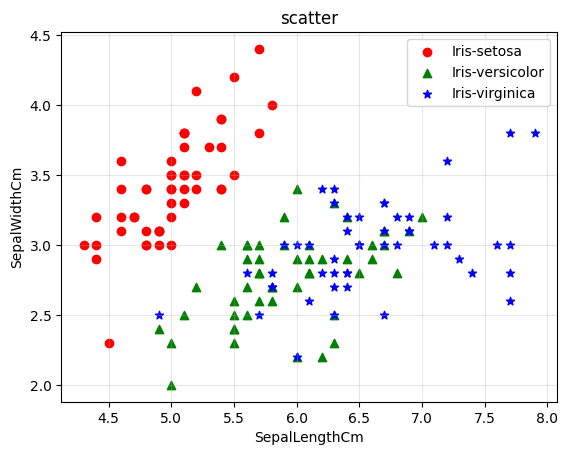

In [ ]:
import matplotlib.pyplot as plt
# 使用系统已有字体替代
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Liberation Sans']
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(x=df_iris['SepalLengthCm'][df_iris['Species'] == 'Iris-setosa'],
y=df_iris['SepalWidthCm'][df_iris['Species'] == 'Iris-setosa'],
c='r',label='Iris-setosa')
plt.scatter(x=df_iris['SepalLengthCm'][df_iris['Species'] == 'Iris-versicolor'],
y=df_iris['SepalWidthCm'][df_iris['Species'] == 'Iris-versicolor'],
c='g', marker='^',label='Iris-versicolor')
plt.scatter(x=df_iris['SepalLengthCm'][df_iris['Species'] == 'Iris-virginica'],
y=df_iris['SepalWidthCm'][df_iris['Species'] == 'Iris-virginica'],
c='b', marker='*',label='Iris-virginica')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('scatter')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split # 导入拆分数据集工具
from sklearn.preprocessing import StandardScaler # 导入标准化工具
x_train_sepal, x_test_sepal, y_train_sepal, y_test_sepal = \
  train_test_split(x_sepal,y,test_size=0.3,random_state=0) # 拆分数据集
print("花萼训练集样本数: ", len(x_train_sepal))
print("花萼测试集样本数: ", len(x_test_sepal))
scaler = 	StandardScaler() # 标准化工具
x_train_sepal = scaler.fit_transform(x_train_sepal) # 训练集数据标准化
x_test_sepal = scaler.transform(x_test_sepal) # 测试集数据标准化
# 合并特征集和标签集，留待以后数据展示之用
X_combined_sepal = np.vstack((x_train_sepal,x_test_sepal)) # 合并特征集
Y_combined_sepal = np.hstack((y_train_sepal,y_test_sepal)) # 合并标签集

花萼训练集样本数:  105
花萼测试集样本数:  45


In [ ]:
from sklearn.linear_model import LogisticRegression # 导入逻辑回归模型
lr = LogisticRegression(penalty='l2', C = 0.1) # 设定L2正则化和C参数
lr.fit(x_train_sepal,y_train_sepal) # 训练机器
score = lr.score(x_test_sepal,y_test_sepal) # 测试集分数评估
print("SK-learn逻辑回归测试准确率 {:.2f}%".format(score*100))

SK-learn逻辑回归测试准确率 68.89%


In [ ]:
import matplotlib.pyplot as plt # 导入matplotlib
from matplotlib.colors import ListedColormap # 导入Colormap
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    markers = ('o','x','v')
    colors = ('red','blue','lightgreen')
    color_Map = ListedColormap(colors[:len(np.unique(y))])
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    X_test, Y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],color = color_Map(idx),marker = markers[idx],label = cl)

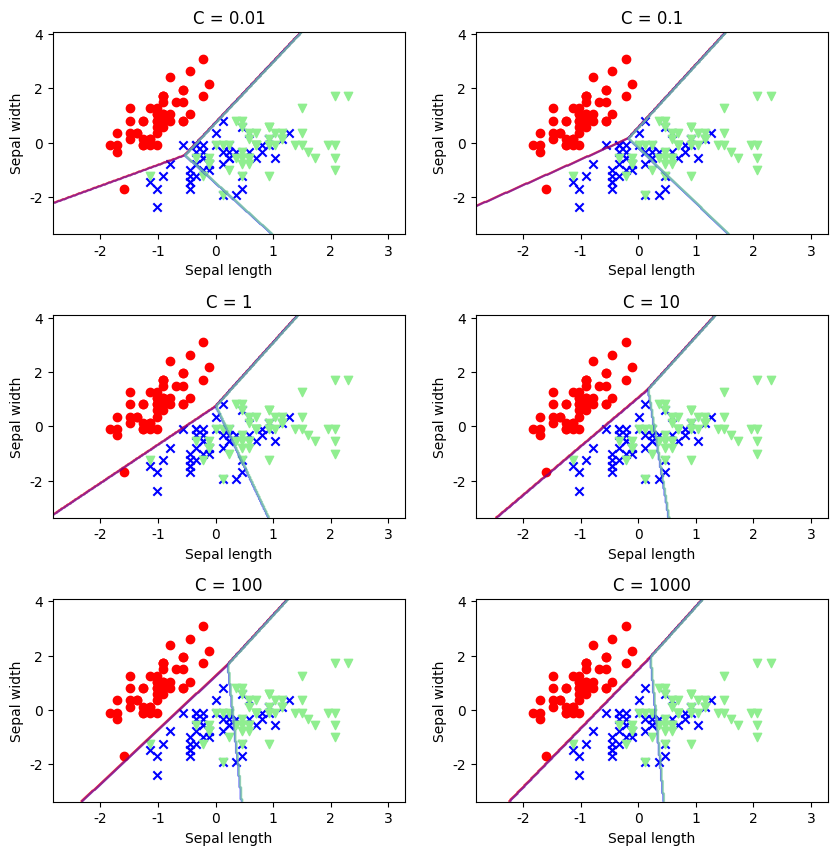

In [ ]:
from sklearn.metrics import accuracy_score # 导入准确率指标
C_param_range = [0.01,0.1,1,10,100,1000]
sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
sepal_acc_table['C_parameter'] = C_param_range
plt.figure(figsize=(10, 10))
j = 0
for i in C_param_range:
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(x_train_sepal,y_train_sepal)
    y_pred_sepal = lr.predict(x_test_sepal)
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_sepal, y = Y_combined_sepal,
                          classifier = lr, test_idx = range(0,150))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('C = %s'%i)

In [ ]:
lr = LogisticRegression(penalty='l2', C = 10) # 设定L2正则化和C参数
lr.fit(x_train_sepal,y_train_sepal) # 训练机器
score = lr.score(x_test_sepal,y_test_sepal) # 测试集分数评估
print("Sklearn逻辑回归测试准确率 {:.2f}%".format(score*100))

Sklearn逻辑回归测试准确率 80.00%
